In [3]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

In [5]:
from sklearn import datasets, svm, metrics
import numpy as np
import matplotlib.pyplot as plt

In [6]:
digits = datasets.load_digits()

In [10]:
digits.images.shape, digits.data.shape, digits.target

((1797L, 8L, 8L), (1797L, 64L), array([0, 1, 2, ..., 8, 9, 8]))

In [17]:
images_and_labels = list(zip(digits.images, digits.target))
images_and_labels[0]

(array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
        [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
        [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
        [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
        [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
        [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
        [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
        [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]]), 0)

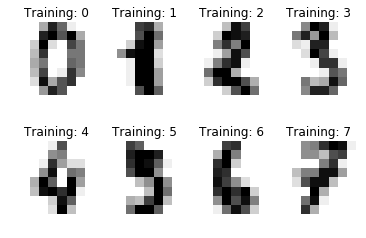

In [31]:
for index, (image, label) in enumerate(images_and_labels[:8]):  # enumerate index, value
    plt.subplot(2, 4, index + 1)  # 一下子产生2 * 4个子窗口
    plt.axis('off')  # 关闭坐标轴
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

In [33]:
n_samples = len(digits.images)
n_samples

1797

In [41]:
# 废逼吊
# data = digits.images.reshape((n_samples, -1))
# digits.data.shape, data.shape

In [58]:
clf = svm.SVC(gamma=0.01)

In [59]:
clf.fit(digits.data[: n_samples // 2], digits.target[: n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
expected = digits.target[n_samples // 2: ]

In [61]:
predicted = clf.predict(digits.data[n_samples // 2: ])

In [62]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.65      0.79        88
          1       1.00      0.74      0.85        91
          2       1.00      0.64      0.78        86
          3       1.00      0.64      0.78        91
          4       1.00      0.55      0.71        92
          5       0.93      0.98      0.95        91
          6       1.00      0.68      0.81        91
          7       1.00      0.49      0.66        89
          8       0.25      1.00      0.40        88
          9       1.00      0.61      0.76        92

avg / total       0.92      0.70      0.75       899




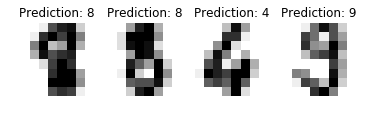

In [66]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()

In [63]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))  # 混淆矩阵，行是真实列是预测

Confusion matrix:
[[57  0  0  0  0  0  0  0 31  0]
 [ 0 67  0  0  0  0  0  0 24  0]
 [ 0  0 55  0  0  0  0  0 31  0]
 [ 0  0  0 58  0  2  0  0 31  0]
 [ 0  0  0  0 51  0  0  0 41  0]
 [ 0  0  0  0  0 89  0  0  2  0]
 [ 0  0  0  0  0  0 62  0 29  0]
 [ 0  0  0  0  0  0  0 44 45  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  0  0  5  0  0 31 56]]


### ROC AUC

In [2]:
import numpy as np
from sklearn import metrics


In [3]:
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])

In [4]:
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)

In [5]:
fpr

array([ 0. ,  0.5,  0.5,  1. ])

In [6]:
tpr

array([ 0.5,  0.5,  1. ,  1. ])

In [7]:
thresholds

array([ 0.8 ,  0.4 ,  0.35,  0.1 ])